In [1]:
import pvlib
import numpy as np

from iv_params import IV_Params

# Set up an example IV curve

In [2]:
fit_params = {'N_s': 1,
              'T_degC_0': 25,
              'I_sc_A_0': 8.094518421606537,
              'I_rs_1_A_0': 1.4589995736357878e-09,
              'n_1_0': 1.0757610939475777,
              'R_s_Ohm_0': 0.0061309204340856795,
              'G_p_S_0': 0.010722597595424977,
              'E_g_eV_0': 1.1}

def  pvlib_iv(fit_params, v, t, f):
    '''
    Run pvlib I from V based on fit_params, for voltage (v),
    temperature (t), effective irradiance (f).
    '''
    k = 8.61733e-5
    nNsVth = fit_params['N_s'] * fit_params['n_1_0'] * k*(273.15+t)
    current = pvlib.pvsystem.i_from_v(
        1/fit_params['G_p_S_0'],
        fit_params['R_s_Ohm_0'],
        nNsVth,
        v,
        fit_params['I_rs_1_A_0'],
        fit_params['I_sc_A_0'] * f
        )
    return current

v = np.arange(-0.005, 0.630, 0.001)
v = np.delete(v, [4,5])
i = pvlib_iv(fit_params, v, 25, 1)

# Use IV_Params

In [3]:
iv = IV_Params(v, i)
iv.calc_iv_params()

{'voc': 0.6201052652961606,
 'isc': 8.093975598317805,
 'vmp': 0.49427401431662576,
 'imp': 7.625752034772122,
 'pmp': 3.769211070409994,
 'ff': 0.7509709688475773}

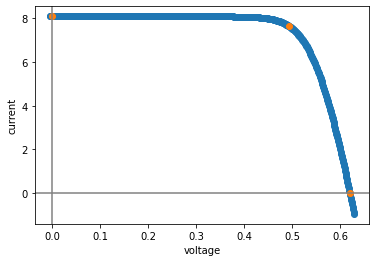

In [4]:
fig = iv.plot_iv_result()

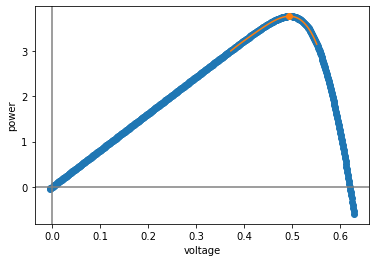

In [5]:
fig = iv.plot_pv_result()